In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [6]:
df = pd.read_csv(r'D:\Uni\2курс(2021-2022)\Прикладная эконометрика\Econometrics1\cereal.csv')

In [5]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [6]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 8.8+ KB


In [9]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [7]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [17]:
df.groupby('mfr')[['calories', 'sugars', 'fat', 'carbo', 'rating']].mean()

,calories,sugars,fat,carbo,rating
mfr,,,,,
A,100.000000,3.000000,1.000000,16.000000,54.850917
G,111.363636,7.954545,1.363636,14.727273,34.485852
K,108.695652,7.565217,0.608696,15.130435,44.038462
N,86.666667,1.833333,0.166667,16.000000,67.968567
P,108.888889,8.777778,0.888889,13.222222,41.705744
Q,95.000000,5.250000,1.750000,10.000000,42.915990
R,115.000000,6.125000,1.250000,17.625000,41.542997


<Figure size 1152x864 with 0 Axes>

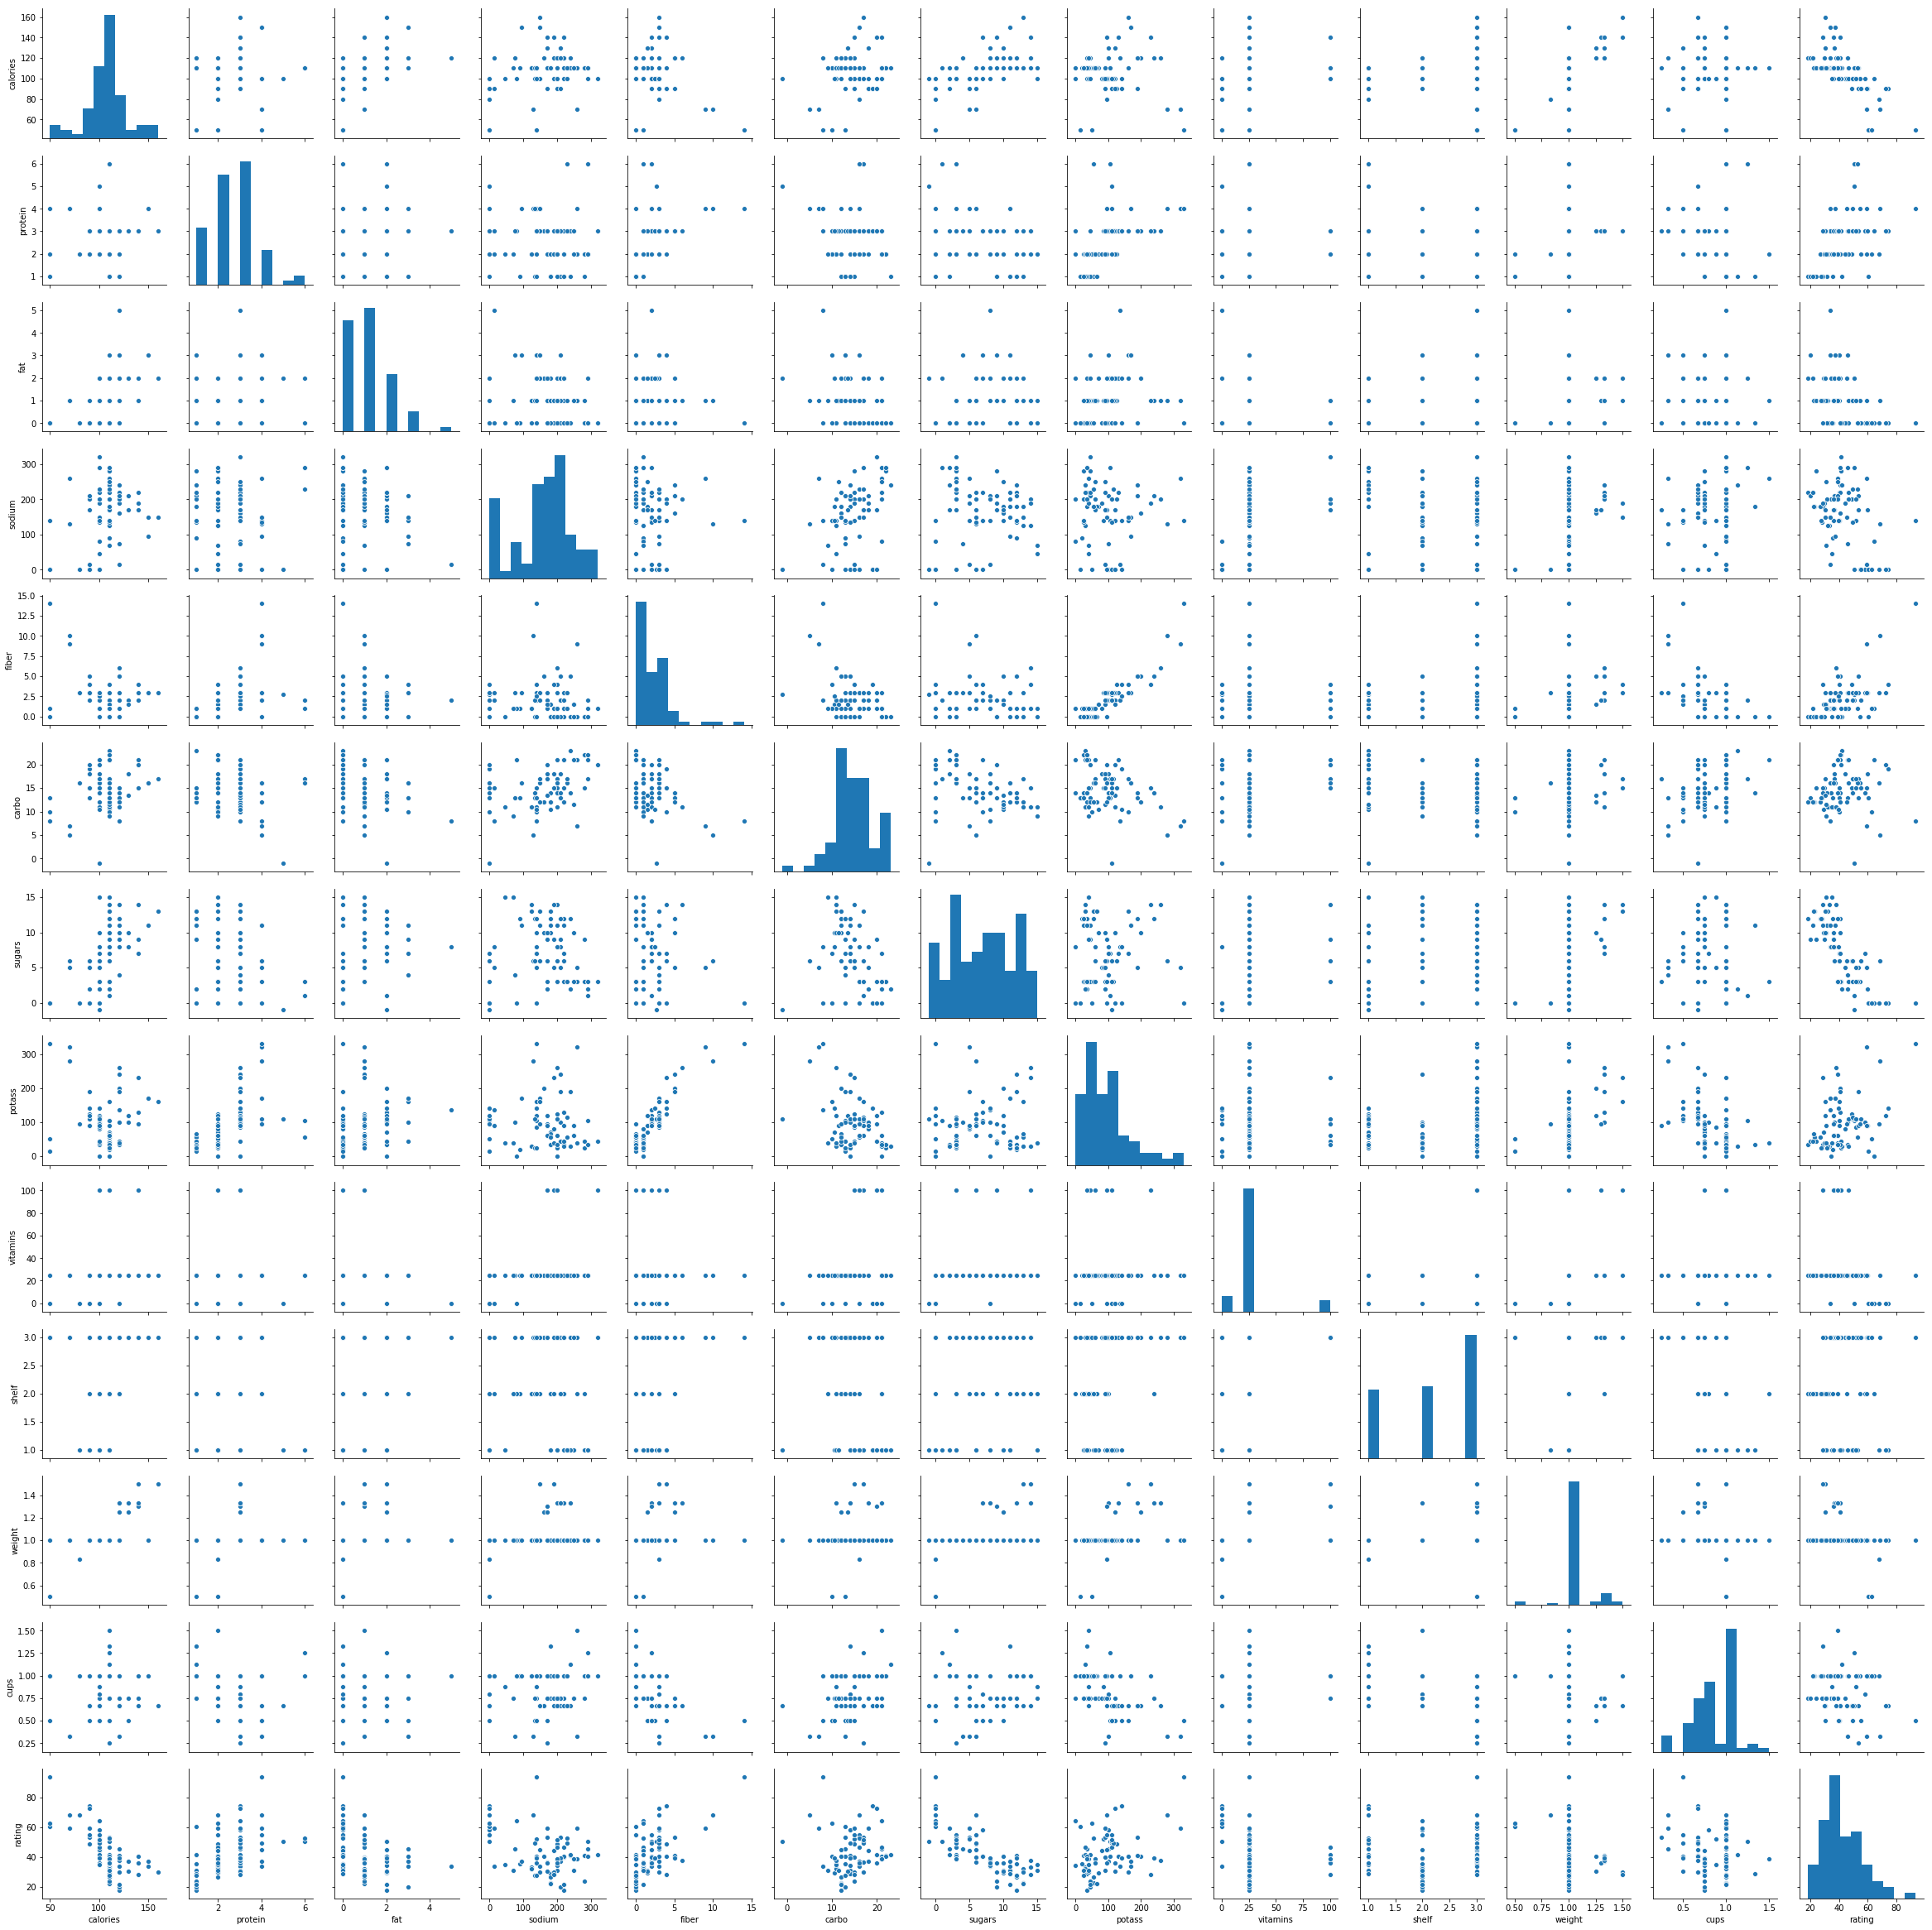

In [19]:
plt.figure(figsize=(16,12))
sns.pairplot(df)
plt.show()

In [8]:
df['mfr'] = pd.factorize(df['mfr'])[0]

In [43]:
df['mfr'].values

array([0, 1, 2, 2, 3, 4, 2, 4, 3, 5, 1, 4, 4, 4, 4, 3, 2, 2, 4, 2, 0, 2,
       4, 3, 2, 2, 2, 5, 2, 5, 5, 4, 5, 5, 5, 1, 4, 5, 2, 2, 4, 1, 4, 6,
       3, 3, 2, 4, 2, 2, 2, 4, 5, 2, 1, 1, 1, 1, 2, 4, 2, 3, 2, 0, 0, 0,
       2, 2, 0, 4, 4, 4, 4, 4, 3, 4, 4], dtype=int32)

In [44]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null int32
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int32(1), int64(8), object(2)
memory usage: 8.8+ KB


In [87]:
df_new = df.drop(['name','type'], axis=1) 

In [88]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
mfr         77 non-null int32
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int32(1), int64(8)
memory usage: 8.2 KB


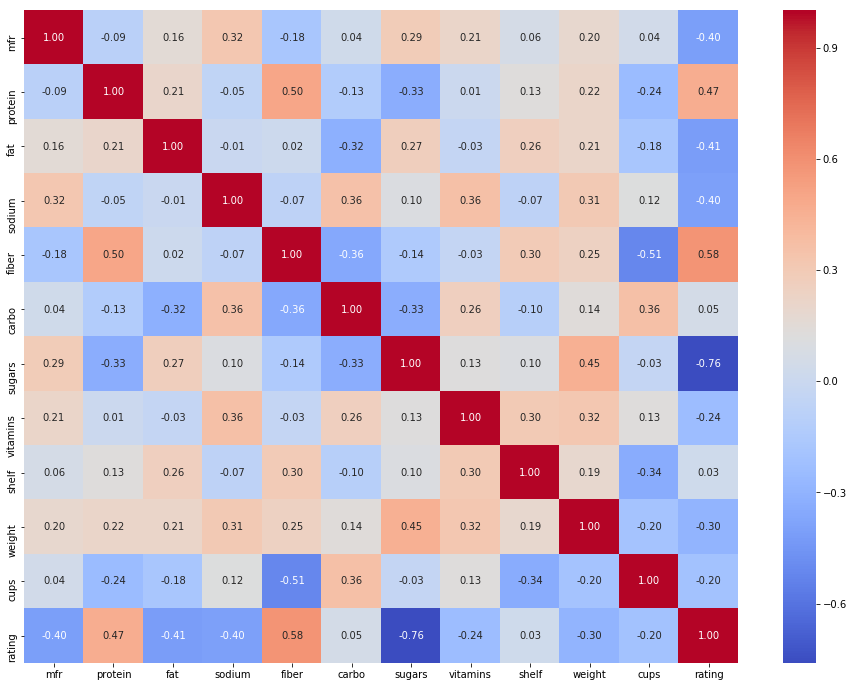

In [22]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_new.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [90]:
df_new = df.drop(['name','type', 'potass'], axis=1) 

In [91]:
y = df_new['rating']
x = df_new.drop('rating', axis=1)
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1699.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           3.04e-75
Time:                        13:02:59   Log-Likelihood:                -90.184
No. Observations:                  77   AIC:                             206.4
Df Residuals:                      64   BIC:                             236.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.4157      0.990     57.992      0.000      55.438      59.394
mfr           -0.1330      0.073     -1.812      0.075      -0.280       0.014
calories      -0.2033      0.016    -12.894      0.000      -0.235      -0.172
protein        2.9401      0.137     21.454      0.000       2.666       3.214
fat           -2.0462      0.170    -12.068      0.000      -2.385      -1.707
sodium        -0.0534      0.001    -36.995      0.000      -0.056      -0.051
fiber          2.6394      0.076     34.554      0.000       2.487       2.792
carbo          1.0487      0.049     21.529      0.000       0.951       1.146
sugars        -0.8077      0.050    -16.040      0.000      -0.908      -0.707
vitamins      -0.0481      0.005     -8.870      0.000      -0.059      -0.037
shelf         -0.1354      0.148     -0.917      0.363      -0.430       0.160
weight        -2.9959      1.416     -2.116      0.038      -5.824      -0.168
cups          -0.2187      0.541     -0.404      0.687      -1.299       0.862
==============================================================================
Omnibus:                        5.795   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.039
Skew:                           0.526   Prob(JB):                       0.0805
Kurtosis:                       3.680   Cond. No.                     3.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df_new = df.drop(['name','type', 'potass', 'calories'], axis=1) 

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
mfr         77 non-null int32
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int32(1), int64(6)
memory usage: 7.0 KB


In [17]:
y = df_new['rating']
x = df_new.drop('rating', axis=1)
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     519.1
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           7.75e-59
Time:                        17:43:14   Log-Likelihood:                -139.48
No. Observations:                  77   AIC:                             303.0
Df Residuals:                      65   BIC:                             331.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.4104      1.858     30.367      0.000      52.700      60.120
mfr           -0.0458      0.138     -0.333      0.740      -0.321       0.229
protein        2.2581      0.238      9.490      0.000       1.783       2.733
fat           -3.5869      0.226    -15.842      0.000      -4.039      -3.135
sodium        -0.0532      0.003    -19.575      0.000      -0.059      -0.048
fiber          3.1384      0.124     25.321      0.000       2.891       3.386
carbo          0.6974      0.076      9.176      0.000       0.546       0.849
sugars        -1.1887      0.077    -15.493      0.000      -1.342      -1.035
vitamins      -0.0477      0.010     -4.668      0.000      -0.068      -0.027
shelf         -0.0289      0.278     -0.104      0.918      -0.583       0.525
weight       -13.9182      2.134     -6.521      0.000     -18.181      -9.655
cups          -0.2424      1.018     -0.238      0.813      -2.276       1.791
==============================================================================
Omnibus:                       11.801   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.414
Skew:                          -0.668   Prob(JB):                     0.000450
Kurtosis:                       4.738   Cond. No.                     2.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
result.params

const       56.410400
mfr         -0.045773
protein      2.258071
fat         -3.586912
sodium      -0.053206
fiber        3.138447
carbo        0.697400
sugars      -1.188732
vitamins    -0.047677
shelf       -0.028861
weight     -13.918186
cups        -0.242445
dtype: float64

In [19]:
result.model.exog_names[1:]

['mfr',
 'protein',
 'fat',
 'sodium',
 'fiber',
 'carbo',
 'sugars',
 'vitamins',
 'shelf',
 'weight',
 'cups']

(array([ 3.,  1.,  0.,  4., 14., 21., 19.,  8.,  4.,  3.]),
 array([-4.50841542, -3.71787132, -2.92732722, -2.13678312, -1.34623901,
        -0.55569491,  0.23484919,  1.02539329,  1.8159374 ,  2.6064815 ,
         3.3970256 ]),
 <a list of 10 Patch objects>)

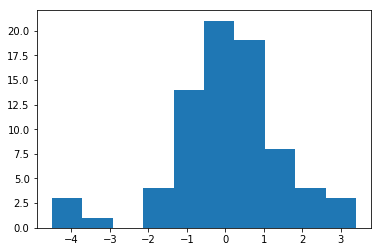

In [20]:
plt.hist(result.resid)

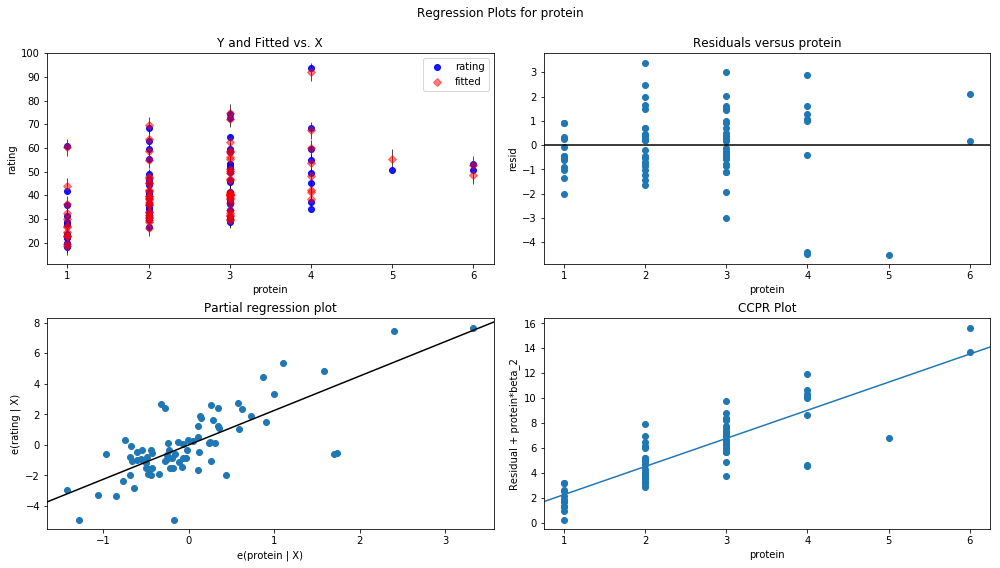

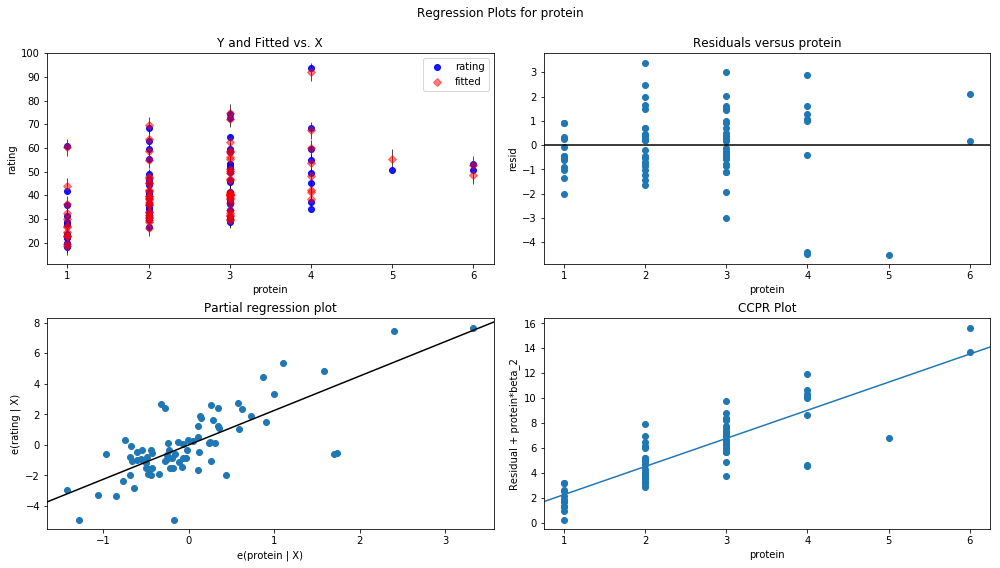

In [97]:
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'protein', fig=fig)

In [98]:
het_goldfeldquandt(result.model.endog, result.model.exog)

(1.4056445493566683, 0.19233190780505977, 'increasing')

In [99]:
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns[1:]]

In [100]:
x.columns

Index(['const', 'mfr', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'vitamins', 'shelf', 'weight', 'cups'],
      dtype='object')

In [101]:
vif

[1.2647236154028512,
 1.9861385086990113,
 1.519759715230354,
 1.5195456944841932,
 2.5541165191863326,
 3.0951405076768976,
 3.404048184458361,
 1.5241524452423143,
 1.5628018593473103,
 3.0192464599955864,
 1.6429087365936796]

In [102]:
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
tol

[0.009772988979353192,
 0.7906865878213802,
 0.5034895580646257,
 0.657998754657362,
 0.658091430636081,
 0.3915248159150433,
 0.3230871094606831,
 0.2937678745458523,
 0.6561023492902752,
 0.6398763822930443,
 0.3312084698118556,
 0.6086765367584247]

In [11]:
y = df_new['rating']
x = df_new['sugars']
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()

result.summary()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     102.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           1.15e-15
Time:                        17:31:38   Log-Likelihood:                -279.09
No. Observations:                  77   AIC:                             562.2
Df Residuals:                      75   BIC:                             566.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.2844      1.948     30.426      0.000      55.403      63.166
sugars        -2.4008      0.237    -10.117      0.000      -2.874      -1.928
==============================================================================
Omnibus:                       13.573   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.301
Skew:                           0.828   Prob(JB):                     0.000289
Kurtosis:                       4.529   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y = df_new['rating']
x = df_new[['protein', 'fat', 'sodium']]
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()

result.summary()

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     41.38
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           9.85e-16
Time:                        17:40:40   Log-Likelihood:                -273.97
No. Observations:                  77   AIC:                             555.9
Df Residuals:                      73   BIC:                             565.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8269      3.289     12.718      0.000      35.273      48.381
protein        7.1888      0.936      7.682      0.000       5.324       9.054
fat           -7.3704      1.016     -7.252      0.000      -9.396      -5.345
sodium        -0.0626      0.012     -5.236      0.000      -0.086      -0.039
==============================================================================
Omnibus:                        6.092   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.407
Skew:                           0.399   Prob(JB):                       0.0406
Kurtosis:                       4.167   Cond. No.                         608.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df_new.corr()

,mfr,protein,fat,sodium,fiber,carbo,sugars,vitamins,shelf,weight,cups,rating
mfr,1.000000,-0.090404,0.157339,0.322118,-0.176405,0.037378,0.289824,0.212631,0.061819,0.195320,0.041339,-0.404075
protein,-0.090404,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.157339,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.322118,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.176405,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.037378,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.289824,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.125137,0.100438,0.450648,-0.032358,-0.759675
vitamins,0.212631,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.061819,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.299262,1.000000,0.190762,-0.335269,0.025159
weight,0.195320,0.216158,0.214625,0.308576,0.247226,0.135136,0.450648,0.320324,0.190762,1.000000,-0.199583,-0.298124
